In [1]:
import pandas as pd

In [2]:
!unzip all_years_DPQ.zip -d content/

Archive:  all_years_DPQ.zip
   creating: content/all_years_DPQ/
   creating: content/all_years_DPQ/bmi/
  inflating: content/all_years_DPQ/bmi/BMX_D.xpt  
  inflating: content/all_years_DPQ/bmi/BMX_E.xpt  
  inflating: content/all_years_DPQ/bmi/BMX_F.xpt  
  inflating: content/all_years_DPQ/bmi/BMX_G.xpt  
  inflating: content/all_years_DPQ/bmi/BMX_H.xpt  
  inflating: content/all_years_DPQ/bmi/BMX_I.xpt  
  inflating: content/all_years_DPQ/bmi/BMX_J.xpt  
  inflating: content/all_years_DPQ/bmi/BMX_L.xpt  
  inflating: content/all_years_DPQ/bmi/P_BMX.xpt  
   creating: content/all_years_DPQ/bpxo/
  inflating: content/all_years_DPQ/bpxo/BPXO_L.xpt  
  inflating: content/all_years_DPQ/bpxo/BPX_D.xpt  
  inflating: content/all_years_DPQ/bpxo/BPX_E.xpt  
  inflating: content/all_years_DPQ/bpxo/BPX_F.xpt  
  inflating: content/all_years_DPQ/bpxo/BPX_G.xpt  
  inflating: content/all_years_DPQ/bpxo/BPX_H.xpt  
  inflating: content/all_years_DPQ/bpxo/BPX_I.xpt  
  inflating: content/all_years_

## PHQ Data

In [9]:
dpq_06 = pd.read_sas("/content/all_years_DPQ/dpq/DPQ_D.xpt", format="xport")
dpq_08 = pd.read_sas("/content/all_years_DPQ/dpq/DPQ_E.xpt", format="xport")
dpq_10 = pd.read_sas("/content/all_years_DPQ/dpq/DPQ_F.xpt", format="xport")
dpq_12 = pd.read_sas("/content/all_years_DPQ/dpq/DPQ_G.xpt", format="xport")
dpq_14 = pd.read_sas("/content/all_years_DPQ/dpq/DPQ_H.xpt", format="xport")
dpq_16 = pd.read_sas("/content/all_years_DPQ/dpq/DPQ_I.xpt", format="xport")
dpq_18 = pd.read_sas("/content/all_years_DPQ/dpq/DPQ_J.xpt", format="xport")
dpq_23 = pd.read_sas("/content/all_years_DPQ/dpq/DPQ_L.xpt", format="xport")
dpq_20 = pd.read_sas("/content/all_years_DPQ/dpq/P_DPQ.xpt", format="xport")

In [10]:
# Assign the corresponding year range to the 'Year' column for each DataFrame
dpq_06['Year'] = '2005-2006'
dpq_08['Year'] = '2007-2008'
dpq_10['Year'] = '2009-2010'
dpq_12['Year'] = '2011-2012'
dpq_14['Year'] = '2013-2014'
dpq_16['Year'] = '2015-2016'
dpq_18['Year'] = '2017-2018'
dpq_20['Year'] = '2017-2020'
dpq_23['Year'] = '2021-2023'

In [11]:
dpq = pd.concat([dpq_06,dpq_08, dpq_10, dpq_12, dpq_14, dpq_16, dpq_18, dpq_20, dpq_23]).dropna()
dpq = dpq.replace({dpq.DPQ010.iloc[4] : 0}).dropna()
dpq = dpq[(dpq.drop(columns=['SEQN','Year']) <= 3).all(axis=1)]

phq_items = ['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090']

dpq['PHQ9_Score'] = dpq[phq_items].sum(axis=1)

dpq

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,Year,PHQ9_Score
4,31139.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,2005-2006,4.0
5,31143.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2005-2006,6.0
8,31150.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-2006,1.0
9,31151.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2005-2006,3.0
10,31152.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2005-2006,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6325,142295.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-2023,2.0
6326,142298.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2021-2023,1.0
6328,142300.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-2023,3.0
6329,142301.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2021-2023,5.0


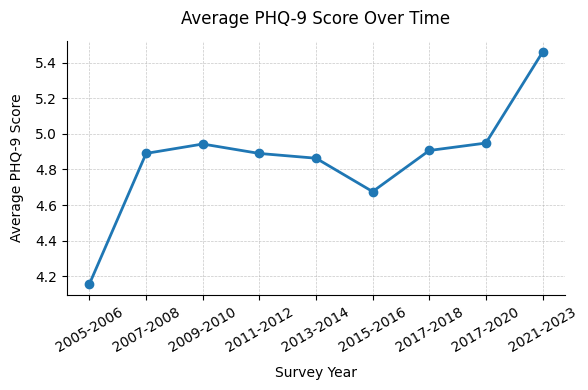

In [12]:
import matplotlib.pyplot as plt

# Compute average PHQ-9 score per year
trend = dpq.groupby("Year")["PHQ9_Score"].mean()

# Create figure & axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot with thicker line and larger markers
ax.plot(
    trend.index,
    trend.values,
    marker='o',
    markersize=6,
    linewidth=2
)

# Titles and labels
ax.set_title("Average PHQ-9 Score Over Time", pad=12)
ax.set_xlabel("Survey Year", labelpad=8)
ax.set_ylabel("Average PHQ-9 Score", labelpad=8)

# Rotate x-ticks
plt.xticks(rotation=30)

# Subtle grid
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Remove top/right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


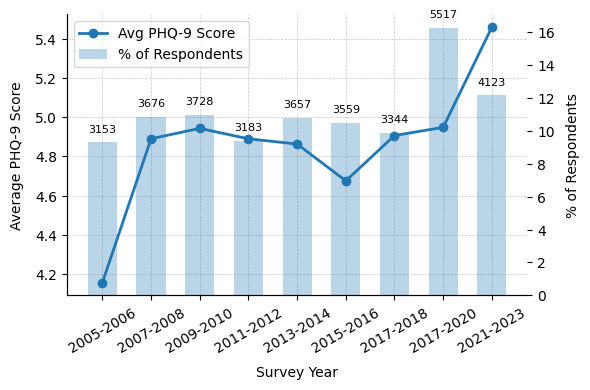

In [13]:
import matplotlib.pyplot as plt

# Compute average PHQ-9 score and respondent counts per year
avg_score = dpq.groupby("Year")["PHQ9_Score"].mean()
counts    = dpq.groupby("Year").size()
pct       = counts / counts.sum() * 100  # percentage of all respondents

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot average PHQ-9 score (line)
ax1.plot(
    avg_score.index,
    avg_score.values,
    marker='o',
    markersize=6,
    linewidth=2,
    label="Avg PHQ-9 Score"
)
ax1.set_xlabel("Survey Year", labelpad=8)
ax1.set_ylabel("Average PHQ-9 Score", labelpad=8)

# Secondary axis for percentage bars
ax2 = ax1.twinx()
bars = ax2.bar(
    pct.index,
    pct.values,
    width=0.6,
    alpha=0.3,
    label="% of Respondents"
)
ax2.set_ylabel("% of Respondents", labelpad=8)

# Annotate each bar with the absolute count
for bar, count in zip(bars, counts.values):
    ax2.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,      # small offset above bar
        f"{int(count)}",
        ha='center',
        va='bottom',
        fontsize=8
    )

# Rotate x-labels
ax1.tick_params(axis='x', rotation=30)

# Styling
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

# Legends
lines, labels    = ax1.get_legend_handles_labels()
bars_handles, bars_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars_handles, labels + bars_labels, loc="upper left")

plt.tight_layout()
plt.show()


In [14]:
dpq['PHQ9_Score'].value_counts()

,count
PHQ9_Score,
1.0,7217
2.0,5954
3.0,4545
4.0,3313
5.0,2422
6.0,2023
7.0,1528
8.0,1272
9.0,1016


In [15]:
dpq['Depression_Label'] = dpq['PHQ9_Score'].apply(lambda x: 0 if x <= 10 else (1 if (x>10 and x <= 20) else 2))

In [16]:
dpq

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,Year,PHQ9_Score,Depression_Label
4,31139.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,2005-2006,4.0,0
5,31143.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2005-2006,6.0,0
8,31150.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-2006,1.0,0
9,31151.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2005-2006,3.0,0
10,31152.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2005-2006,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6325,142295.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-2023,2.0,0
6326,142298.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2021-2023,1.0,0
6328,142300.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-2023,3.0,0
6329,142301.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2021-2023,5.0,0


In [17]:
dpq['Depression_Label'].value_counts()

,count
Depression_Label,
0,30149
1,3411
2,380


## Demographic Data

In [18]:
import pandas as pd

# Load NHANES demographic data files into pandas DataFrames
demo_06 = pd.read_sas("/content/all_years_DPQ/demo/DEMO_D.xpt", format="xport")
demo_08 = pd.read_sas("/content/all_years_DPQ/demo/DEMO_E.xpt", format="xport")
demo_10 = pd.read_sas("/content/all_years_DPQ/demo/DEMO_F.xpt", format="xport")
demo_12 = pd.read_sas("/content/all_years_DPQ/demo/DEMO_G.xpt", format="xport")
demo_14 = pd.read_sas("/content/all_years_DPQ/demo/DEMO_H.xpt", format="xport")
demo_16 = pd.read_sas("/content/all_years_DPQ/demo/DEMO_I.xpt", format="xport")
demo_18 = pd.read_sas("/content/all_years_DPQ/demo/DEMO_J.xpt", format="xport")
demo_20 = pd.read_sas("/content/all_years_DPQ/demo/P_DEMO.xpt", format="xport")
demo_23 = pd.read_sas("/content/all_years_DPQ/demo/DEMO_L.xpt", format="xport")


In [19]:
# Concatenate multiple DataFrames and drop rows with any missing values
demo = pd.concat([demo_06, demo_08, demo_10, demo_12, demo_14, demo_16, demo_18, demo_20, demo_23])

demo = demo[['SEQN', 'RIDAGEYR', 'RIAGENDR',	'RIDRETH3','DMDMARTZ', 'INDFMPIR', 'DMDEDUC2']]

demo = demo.dropna()

In [20]:
demo = demo[(demo.DMDMARTZ != 99) & (demo.DMDMARTZ != 77)]

In [21]:
demo = demo[(demo.DMDEDUC2 != 9) & (demo.DMDEDUC2 != 7)]

In [22]:
demo.rename(columns={
    'RIDAGEYR': 'Age',
    'RIAGENDR': 'Gender',        # 1 = Male, 2 = Female
    'INDFMPIR': 'IncomeRatio',    # Poverty Income Ratio
    'RIDRETH3': 'Race',
    # 'DMDBORN4': 'CountryBirth',
    'DMDEDUC2': 'EducationLevel',
    'DMDMARTZ': 'MaritalStatus'
}, inplace=True)


demo

,SEQN,Age,Gender,Race,MaritalStatus,IncomeRatio,EducationLevel
3,109266.0,29.0,2.0,6.0,3.0,5.00,5.0
4,109267.0,21.0,2.0,2.0,3.0,5.00,4.0
10,109273.0,36.0,1.0,3.0,3.0,0.83,4.0
11,109274.0,68.0,1.0,7.0,3.0,1.20,4.0
19,109282.0,76.0,1.0,3.0,1.0,3.61,5.0
...,...,...,...,...,...,...,...
11925,142303.0,69.0,2.0,7.0,2.0,0.98,3.0
11927,142305.0,76.0,2.0,1.0,2.0,2.25,1.0
11930,142308.0,50.0,1.0,2.0,1.0,1.95,4.0
11931,142309.0,40.0,1.0,2.0,2.0,3.11,4.0


In [23]:
demo = pd.merge(demo, dpq[['SEQN', 'PHQ9_Score', 'Depression_Label', 'Year']], on='SEQN', how='outer')
demo

,SEQN,Age,Gender,Race,MaritalStatus,IncomeRatio,EducationLevel,PHQ9_Score,Depression_Label,Year
0,31139.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,2005-2006
1,31143.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0,2005-2006
2,31150.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,2005-2006
3,31151.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,2005-2006
4,31152.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,2005-2006
...,...,...,...,...,...,...,...,...,...,...
40187,142303.0,69.0,2.0,7.0,2.0,0.98,3.0,NaN,NaN,NaN
40188,142305.0,76.0,2.0,1.0,2.0,2.25,1.0,NaN,NaN,NaN
40189,142308.0,50.0,1.0,2.0,1.0,1.95,4.0,NaN,NaN,NaN
40190,142309.0,40.0,1.0,2.0,2.0,3.11,4.0,NaN,NaN,NaN


In [24]:
# demo.drop(columns = [])

In [25]:
demo = demo.dropna()

In [26]:
demo

,SEQN,Age,Gender,Race,MaritalStatus,IncomeRatio,EducationLevel,PHQ9_Score,Depression_Label,Year
24303,109273.0,36.0,1.0,3.0,3.0,0.83,4.0,15.0,1.0,2017-2020
24305,109282.0,76.0,1.0,3.0,1.0,3.61,5.0,5.0,0.0,2017-2020
24308,109290.0,68.0,2.0,4.0,2.0,5.00,5.0,2.0,0.0,2017-2020
24310,109292.0,58.0,1.0,2.0,2.0,1.60,3.0,8.0,0.0,2017-2020
24311,109293.0,44.0,1.0,3.0,3.0,0.02,3.0,3.0,0.0,2017-2020
...,...,...,...,...,...,...,...,...,...,...
40180,142295.0,80.0,2.0,3.0,2.0,4.66,3.0,2.0,0.0,2021-2023
40182,142298.0,60.0,1.0,7.0,1.0,2.51,3.0,1.0,0.0,2021-2023
40184,142300.0,46.0,2.0,1.0,1.0,0.68,3.0,3.0,0.0,2021-2023
40185,142301.0,80.0,2.0,3.0,2.0,1.20,5.0,5.0,0.0,2021-2023


In [69]:
demo[["Year","Race","PHQ9_Score"]].dropna().Year.value_counts()

,count
Year,
2017-2020,4581
2021-2023,3464


<ipython-input-65-1138d9218a44>:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


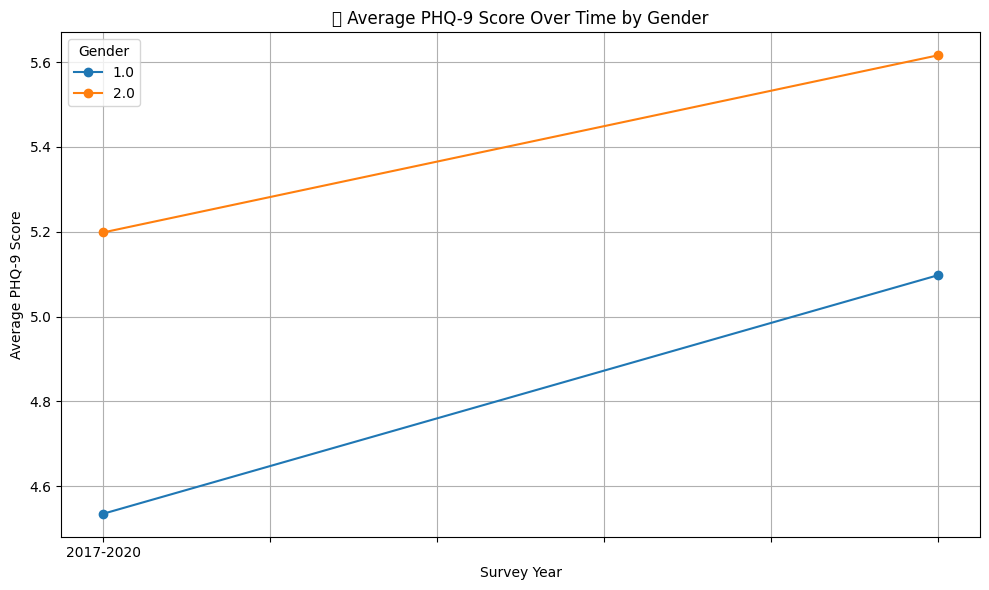

In [65]:
import matplotlib.pyplot as plt


trend = demo[["Year", "Gender", "PHQ9_Score"]].groupby(["Year", "Gender"])["PHQ9_Score"].mean().unstack()
trend.plot(marker='o', figsize=(10, 6))
plt.title("📊 Average PHQ-9 Score Over Time by Gender")
plt.ylabel("Average PHQ-9 Score")
plt.xlabel("Survey Year")
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
demo.to_excel('demo_all_years.xlsx')

### Occupation

In [27]:
occ_06 = pd.read_sas("/content/all_years_DPQ/demo/occ/OCQ_D.xpt", format="xport")
occ_08 = pd.read_sas("/content/all_years_DPQ/demo/occ/OCQ_E.xpt", format="xport")
occ_10 = pd.read_sas("/content/all_years_DPQ/demo/occ/OCQ_F.xpt", format="xport")
occ_12 = pd.read_sas("/content/all_years_DPQ/demo/occ/OCQ_G.xpt", format="xport")
occ_14 = pd.read_sas("/content/all_years_DPQ/demo/occ/OCQ_H.xpt", format="xport")
occ_16 = pd.read_sas("/content/all_years_DPQ/demo/occ/OCQ_I.xpt", format="xport")
occ_18 = pd.read_sas("/content/all_years_DPQ/demo/occ/OCQ_J.xpt", format="xport")
occ_20 = pd.read_sas("/content/all_years_DPQ/demo/occ/P_OCQ.xpt", format="xport")
occ_23 = pd.read_sas("/content/all_years_DPQ/demo/occ/OCQ_L.xpt", format="xport")

In [28]:
# Concatenate multiple DataFrames
occ = pd.concat([occ_06, occ_08, occ_10, occ_12, occ_14, occ_16, occ_18, occ_20, occ_23])

In [29]:
occ = occ[['SEQN', 'OCQ180', 'OCQ670']]

occ = occ[(occ.OCQ180 != 77777) & (occ.OCQ180 != 99999) & (occ.OCQ670 != 7) & (occ.OCQ670 != 9)]

occ.rename(columns={
    'OCQ180': 'HoursWorked',
    'OCQ670': 'WorkSchedule'
}, inplace=True)

occ = occ.dropna()

occ

,SEQN,HoursWorked,WorkSchedule
0,93705.0,30.0,5.0
4,93711.0,35.0,1.0
5,93712.0,55.0,1.0
9,93716.0,40.0,1.0
12,93721.0,5.0,5.0
...,...,...,...
10189,124814.0,40.0,1.0
10190,124815.0,16.0,3.0
10192,124818.0,48.0,1.0
10193,124821.0,46.0,3.0


In [30]:
demo = pd.merge(demo, occ, on='SEQN', how='left')
demo

,SEQN,Age,Gender,Race,MaritalStatus,IncomeRatio,EducationLevel,PHQ9_Score,Depression_Label,Year,HoursWorked,WorkSchedule
0,109273.0,36.0,1.0,3.0,3.0,0.83,4.0,15.0,1.0,2017-2020,28.0,2.0
1,109282.0,76.0,1.0,3.0,1.0,3.61,5.0,5.0,0.0,2017-2020,NaN,NaN
2,109290.0,68.0,2.0,4.0,2.0,5.00,5.0,2.0,0.0,2017-2020,60.0,2.0
3,109292.0,58.0,1.0,2.0,2.0,1.60,3.0,8.0,0.0,2017-2020,NaN,NaN
4,109293.0,44.0,1.0,3.0,3.0,0.02,3.0,3.0,0.0,2017-2020,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8040,142295.0,80.0,2.0,3.0,2.0,4.66,3.0,2.0,0.0,2021-2023,NaN,NaN
8041,142298.0,60.0,1.0,7.0,1.0,2.51,3.0,1.0,0.0,2021-2023,NaN,NaN
8042,142300.0,46.0,2.0,1.0,1.0,0.68,3.0,3.0,0.0,2021-2023,NaN,NaN
8043,142301.0,80.0,2.0,3.0,2.0,1.20,5.0,5.0,0.0,2021-2023,NaN,NaN


In [31]:
demo.dropna()

,SEQN,Age,Gender,Race,MaritalStatus,IncomeRatio,EducationLevel,PHQ9_Score,Depression_Label,Year,HoursWorked,WorkSchedule
0,109273.0,36.0,1.0,3.0,3.0,0.83,4.0,15.0,1.0,2017-2020,28.0,2.0
2,109290.0,68.0,2.0,4.0,2.0,5.00,5.0,2.0,0.0,2017-2020,60.0,2.0
5,109315.0,30.0,2.0,4.0,3.0,2.16,4.0,1.0,0.0,2017-2020,28.0,5.0
7,109323.0,22.0,1.0,1.0,3.0,2.38,4.0,4.0,0.0,2017-2020,35.0,5.0
12,109340.0,44.0,1.0,7.0,1.0,1.13,4.0,1.0,0.0,2017-2020,10.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4571,124793.0,35.0,1.0,1.0,1.0,2.31,3.0,4.0,0.0,2017-2020,42.0,3.0
4574,124809.0,23.0,2.0,1.0,1.0,4.34,4.0,12.0,1.0,2017-2020,30.0,5.0
4575,124810.0,56.0,2.0,4.0,3.0,1.93,4.0,1.0,0.0,2017-2020,40.0,1.0
4579,124818.0,40.0,1.0,4.0,1.0,3.82,5.0,1.0,0.0,2017-2020,48.0,1.0


## Health indicators

### BMI

In [ ]:
# Load BMX files from the '/content/bmi/' directory
bmi_06 = pd.read_sas("/content/all_years_DPQ/bmi/BMX_D.xpt", format="xport")
bmi_08 = pd.read_sas("/content/all_years_DPQ/bmi/BMX_E.xpt", format="xport")
bmi_10 = pd.read_sas("/content/all_years_DPQ/bmi/BMX_F.xpt", format="xport")
bmi_12 = pd.read_sas("/content/all_years_DPQ/bmi/BMX_G.xpt", format="xport")
bmi_14 = pd.read_sas("/content/all_years_DPQ/bmi/BMX_H.xpt", format="xport")
bmi_16 = pd.read_sas("/content/all_years_DPQ/bmi/BMX_I.xpt", format="xport")
bmi_18 = pd.read_sas("/content/all_years_DPQ/bmi/BMX_J.xpt", format="xport")
bmi_20 = pd.read_sas("/content/all_years_DPQ/bmi/P_BMX.xpt", format="xport")
bmi_23 = pd.read_sas("/content/all_years_DPQ/bmi/BMX_L.xpt", format="xport")


In [ ]:
# Concatenate multiple DataFrames and drop rows with any missing values
bmi = pd.concat([bmi_06, bmi_08, bmi_10, bmi_12, bmi_14, bmi_16, bmi_18, bmi_20, bmi_23])
bmi = bmi [['SEQN','BMXWT', 'BMXBMI']]
bmi = bmi.dropna()
bmi = bmi.rename(columns = {'BMXWT' : 'Weight', 'BMXBMI' : 'BMI'})
bmi

,SEQN,Weight,BMI
1,31128.0,40.1,17.45
2,31129.0,74.6,26.53
4,31131.0,75.2,30.90
5,31132.0,69.5,24.74
6,31133.0,45.0,16.79
...,...,...,...
8854,142305.0,60.4,26.40
8855,142306.0,25.3,15.40
8857,142308.0,79.3,26.40
8858,142309.0,81.9,25.50


In [ ]:
# bmi = pd.merge(dpq, bmi, on = ['SEQN', 'Depression_Label'], how = 'outer')
# bmi

### Blood Pressure

In [ ]:
import pandas as pd

# Load BPXO files from the '/content/bpxo/' directory
bpxo_06 = pd.read_sas("/content/all_years_DPQ/bpxo/BPX_D.xpt", format="xport")
bpxo_08 = pd.read_sas("/content/all_years_DPQ/bpxo/BPX_E.xpt", format="xport")
bpxo_10 = pd.read_sas("/content/all_years_DPQ/bpxo/BPX_F.xpt", format="xport")
bpxo_12 = pd.read_sas("/content/all_years_DPQ/bpxo/BPX_G.xpt", format="xport")
bpxo_14 = pd.read_sas("/content/all_years_DPQ/bpxo/BPX_H.xpt", format="xport")
bpxo_16 = pd.read_sas("/content/all_years_DPQ/bpxo/BPX_I.xpt", format="xport")
bpxo_18 = pd.read_sas("/content/all_years_DPQ/bpxo/BPX_J.xpt", format="xport")
bpxo_20 = pd.read_sas("/content/all_years_DPQ/bpxo/P_BPXO.xpt", format="xport")
bpxo_23 = pd.read_sas("/content/all_years_DPQ/bpxo/BPXO_L.xpt", format="xport")


In [ ]:
# Concatenate multiple DataFrames and drop rows with any missing values
bpxo = pd.concat([bpxo_06, bpxo_08, bpxo_10, bpxo_12, bpxo_14, bpxo_16, bpxo_18, bpxo_20, bpxo_23])
bpxo = bpxo[['SEQN','BPXOSY3','BPXODI3','BPXOPLS3']]
bpxo = bpxo.dropna()
bpxo

,SEQN,BPXOSY3,BPXODI3,BPXOPLS3
0,109264.0,106.0,66.0,91.0
1,109266.0,99.0,52.0,66.0
2,109270.0,127.0,70.0,93.0
3,109271.0,111.0,68.0,70.0
4,109273.0,115.0,68.0,70.0
...,...,...,...,...
7795,142305.0,144.0,79.0,71.0
7797,142307.0,131.0,72.0,67.0
7798,142308.0,112.0,74.0,69.0
7799,142309.0,128.0,81.0,83.0


In [ ]:
# bpxo = pd.merge(bpxo, dpq[['SEQN', 'Depression_Label']], on='SEQN', how='inner')
bpxo = bpxo.rename(columns = {'BPXOSY3'	: 'Systolic', 'BPXODI3' : 'Diastolic'	, 'BPXOPLS3' : 'Pulse'})
bpxo

,SEQN,Systolic,Diastolic,Pulse
0,109264.0,106.0,66.0,91.0
1,109266.0,99.0,52.0,66.0
2,109270.0,127.0,70.0,93.0
3,109271.0,111.0,68.0,70.0
4,109273.0,115.0,68.0,70.0
...,...,...,...,...
7795,142305.0,144.0,79.0,71.0
7797,142307.0,131.0,72.0,67.0
7798,142308.0,112.0,74.0,69.0
7799,142309.0,128.0,81.0,83.0


### Triglyceride

In [ ]:
import pandas as pd

# Load TRIGLY files from the '/content/trigly/' directory
trigly_06 = pd.read_sas("/content/all_years_DPQ/trigly/TRIGLY_D.xpt", format="xport")
trigly_08 = pd.read_sas("/content/all_years_DPQ/trigly/TRIGLY_E.xpt", format="xport")
trigly_10 = pd.read_sas("/content/all_years_DPQ/trigly/TRIGLY_F.xpt", format="xport")
trigly_12 = pd.read_sas("/content/all_years_DPQ/trigly/TRIGLY_G.xpt", format="xport")
trigly_14 = pd.read_sas("/content/all_years_DPQ/trigly/TRIGLY_H.xpt", format="xport")
trigly_16 = pd.read_sas("/content/all_years_DPQ/trigly/TRIGLY_I.xpt", format="xport")
trigly_18 = pd.read_sas("/content/all_years_DPQ/trigly/TRIGLY_J.xpt", format="xport")
trigly_20 = pd.read_sas("/content/all_years_DPQ/trigly/P_TRIGLY.xpt", format="xport")
# trigly_23 = pd.read_sas("/content/trigly/TRIGLY_L.xpt", format="xport")


In [ ]:
trigly = pd.concat([trigly_06, trigly_08, trigly_10, trigly_12, trigly_14, trigly_16, trigly_18, trigly_20])
trigly = trigly[['SEQN','LBXTR','LBDLDL']].dropna()
trigly

,SEQN,LBXTR,LBDLDL
1,31131.0,86.0,49.0
2,31132.0,65.0,75.0
3,31133.0,61.0,81.0
4,31134.0,195.0,98.0
7,31148.0,67.0,60.0
...,...,...,...
5085,124813.0,45.0,96.0
5086,124814.0,74.0,160.0
5087,124815.0,38.0,128.0
5088,124821.0,51.0,101.0


In [ ]:
# trigyl = pd.merge(trigly, dpq[['SEQN', 'Depression_Label']], on='SEQN', how='inner')
trigly = trigly.rename(columns = {'LBXTR'	: 'Triglyceride (mg/dL)', 'LBDLDL' : 'LDL-Cholesterol (mg/dL)'})
trigly

,SEQN,Triglyceride (mg/dL),LDL-Cholesterol (mg/dL)
1,31131.0,86.0,49.0
2,31132.0,65.0,75.0
3,31133.0,61.0,81.0
4,31134.0,195.0,98.0
7,31148.0,67.0,60.0
...,...,...,...
5085,124813.0,45.0,96.0
5086,124814.0,74.0,160.0
5087,124815.0,38.0,128.0
5088,124821.0,51.0,101.0


### Diabetes

In [ ]:
import pandas as pd

# Load DIQ files from the '/content/diab/' directory
diab_06 = pd.read_sas("/content/all_years_DPQ/diab/DIQ_D.xpt", format="xport")
diab_08 = pd.read_sas("/content/all_years_DPQ/diab/DIQ_E.xpt", format="xport")
diab_10 = pd.read_sas("/content/all_years_DPQ/diab/DIQ_F.xpt", format="xport")
diab_12 = pd.read_sas("/content/all_years_DPQ/diab/DIQ_G.xpt", format="xport")
diab_14 = pd.read_sas("/content/all_years_DPQ/diab/DIQ_H.xpt", format="xport")
diab_16 = pd.read_sas("/content/all_years_DPQ/diab/DIQ_I.xpt", format="xport")
diab_18 = pd.read_sas("/content/all_years_DPQ/diab/DIQ_J.xpt", format="xport")
diab_20 = pd.read_sas("/content/all_years_DPQ/diab/P_DIQ.xpt", format="xport")
diab_23 = pd.read_sas("/content/all_years_DPQ/diab/DIQ_L.xpt", format="xport")


In [ ]:
# Concatenate multiple DataFrames
diab = pd.concat([diab_06, diab_08, diab_10, diab_12, diab_14, diab_16, diab_18, diab_20, diab_23])

diab = diab[['SEQN','DIQ010']]
diab = diab.dropna()
# diab = pd.merge(diab, dpq[['SEQN', 'Depression_Label']], on='SEQN', how='right')
diab = diab.rename(columns = {'DIQ010' : 'Diabetes'})
mp = {1:1, 2:0, 3:1, 7 : None, 9 : None}
diab['Diabetes'] = diab['Diabetes'].apply(lambda x : mp[x] )

diab

,SEQN,Diabetes
0,31128.0,0.0
1,31129.0,0.0
2,31130.0,0.0
3,31131.0,0.0
4,31132.0,1.0
...,...,...
11739,142306.0,0.0
11740,142307.0,1.0
11741,142308.0,0.0
11742,142309.0,0.0


In [ ]:
diab.Diabetes.value_counts()

,count
Diabetes,
0.0,84562
1.0,9309


### HDL

In [ ]:
import pandas as pd

# Load HDL files from the '/content/hdl/' directory
hdl_06 = pd.read_sas("/content/all_years_DPQ/hdl/HDL_D.xpt", format="xport")
hdl_08 = pd.read_sas("/content/all_years_DPQ/hdl/HDL_E.xpt", format="xport")
hdl_10 = pd.read_sas("/content/all_years_DPQ/hdl/HDL_F.xpt", format="xport")
hdl_12 = pd.read_sas("/content/all_years_DPQ/hdl/HDL_G.xpt", format="xport")
hdl_14 = pd.read_sas("/content/all_years_DPQ/hdl/HDL_H.xpt", format="xport")
hdl_16 = pd.read_sas("/content/all_years_DPQ/hdl/HDL_I.xpt", format="xport")
hdl_18 = pd.read_sas("/content/all_years_DPQ/hdl/HDL_J.xpt", format="xport")
hdl_20 = pd.read_sas("/content/all_years_DPQ/hdl/P_HDL.xpt", format="xport")
hdl_23 = pd.read_sas("/content/all_years_DPQ/hdl/HDL_L.xpt", format="xport")


In [ ]:
# Concatenate multiple DataFrames
hdl = pd.concat([hdl_06, hdl_08, hdl_10, hdl_12, hdl_14, hdl_16, hdl_18, hdl_20, hdl_23])
hdl = hdl[['SEQN','LBDHDD']].dropna()
hdl

,SEQN,LBDHDD
0,31128.0,55.0
1,31129.0,46.0
3,31131.0,39.0
4,31132.0,59.0
5,31133.0,54.0
...,...,...
8060,142303.0,34.0
8062,142305.0,51.0
8064,142307.0,79.0
8066,142309.0,54.0


In [ ]:
# hdl = pd.merge(hdl, dpq[['SEQN', 'Depression_Label']], on='SEQN', how='right')
hdl = hdl.rename(columns = {'LBDHDD' : 'HDL-Cholesterol (mg/dL)'})
hdl

,SEQN,HDL-Cholesterol (mg/dL)
0,31128.0,55.0
1,31129.0,46.0
3,31131.0,39.0
4,31132.0,59.0
5,31133.0,54.0
...,...,...
8060,142303.0,34.0
8062,142305.0,51.0
8064,142307.0,79.0
8066,142309.0,54.0


### Cholesterol

In [ ]:
chol = pd.merge(trigly, hdl, on = ['SEQN'], how = 'outer')
chol

,SEQN,Triglyceride (mg/dL),LDL-Cholesterol (mg/dL),HDL-Cholesterol (mg/dL)
0,31128.0,NaN,NaN,55.0
1,31129.0,NaN,NaN,46.0
2,31131.0,86.0,49.0,39.0
3,31132.0,65.0,75.0,59.0
4,31133.0,61.0,81.0,54.0
...,...,...,...,...
68913,142303.0,NaN,NaN,34.0
68914,142305.0,NaN,NaN,51.0
68915,142307.0,NaN,NaN,79.0
68916,142309.0,NaN,NaN,54.0


### All Health

In [ ]:
# ['SEQN', 'Depression_Label']

In [ ]:
from functools import reduce
import pandas as pd

# List of all DataFrames
dfs = [dpq[['Depression_Label', 'SEQN']], bmi, bpxo, chol, diab]

# Merge all DataFrames on 'SEQN' and 'Depression_Label' using outer join
health = reduce(lambda left, right: pd.merge(left, right, on=['SEQN'], how='left'), dfs)

health

,Depression_Label,SEQN,Weight,BMI,Systolic,Diastolic,Pulse,Triglyceride (mg/dL),LDL-Cholesterol (mg/dL),HDL-Cholesterol (mg/dL),Diabetes
0,0,31139.0,73.9,29.45,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,0,31143.0,76.4,22.57,NaN,NaN,NaN,NaN,NaN,44.0,0.0
2,0,31150.0,85.0,28.93,NaN,NaN,NaN,50.0,90.0,81.0,0.0
3,0,31151.0,82.9,29.51,NaN,NaN,NaN,123.0,104.0,76.0,1.0
4,0,31152.0,94.1,39.88,NaN,NaN,NaN,NaN,NaN,68.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
33935,0,142295.0,94.0,33.10,137.0,77.0,71.0,NaN,NaN,46.0,0.0
33936,0,142298.0,111.4,38.50,111.0,68.0,73.0,NaN,NaN,34.0,0.0
33937,0,142300.0,75.2,32.60,142.0,93.0,70.0,NaN,NaN,55.0,0.0
33938,0,142301.0,82.2,30.50,NaN,NaN,NaN,NaN,NaN,48.0,0.0


## Lifestyle; Alcohol, Smoking, Sleep

### Sleep

In [ ]:
import pandas as pd

# Load SLQ files from the '/content/life/' directory
slq_06 = pd.read_sas("/content/all_years_DPQ/life/SLQ_D.xpt", format="xport")
slq_08 = pd.read_sas("/content/all_years_DPQ/life/SLQ_E.xpt", format="xport")
slq_10 = pd.read_sas("/content/all_years_DPQ/life/SLQ_F.xpt", format="xport")
slq_12 = pd.read_sas("/content/all_years_DPQ/life/SLQ_G.xpt", format="xport")
slq_14 = pd.read_sas("/content/all_years_DPQ/life/SLQ_H.xpt", format="xport")
slq_16 = pd.read_sas("/content/all_years_DPQ/life/SLQ_I.xpt", format="xport")
slq_18 = pd.read_sas("/content/all_years_DPQ/life/SLQ_J.xpt", format="xport")
slq_20 = pd.read_sas("/content/all_years_DPQ/life/P_SLQ.xpt", format="xport")
slq_23 = pd.read_sas("/content/all_years_DPQ/life/SLQ_L.xpt", format="xport")


In [ ]:
slq = pd.concat([slq_06, slq_08, slq_10, slq_12, slq_14, slq_16, slq_18, slq_20, slq_23])

slq = slq[['SEQN', 'SLQ050']].dropna()
slq = slq[(slq['SLQ050'] != 7) & (slq['SLQ050'] != 9)]
mp = {1:1, 2:0}
slq['SLQ050'] = slq['SLQ050'].apply(lambda x : mp[x] )

slq = slq.rename(columns = {'SLQ050':'SleepProblem'})

slq

,SEQN,SleepProblem
0,31130.0,0
1,31131.0,0
2,31132.0,0
3,31133.0,0
4,31134.0,1
...,...,...
10190,124815.0,0
10191,124817.0,0
10192,124818.0,0
10193,124821.0,0


### Smoking

In [ ]:
smq_06 = pd.read_sas("/content/all_years_DPQ/life/SMQ_D.xpt", format="xport")
smq_08 = pd.read_sas("/content/all_years_DPQ/life/SMQ_E.xpt", format="xport")
smq_10 = pd.read_sas("/content/all_years_DPQ/life/SMQ_F.xpt", format="xport")
smq_12 = pd.read_sas("/content/all_years_DPQ/life/SMQ_G.xpt", format="xport")
smq_14 = pd.read_sas("/content/all_years_DPQ/life/SMQ_H.xpt", format="xport")
smq_16 = pd.read_sas("/content/all_years_DPQ/life/SMQ_I.xpt", format="xport")
smq_18 = pd.read_sas("/content/all_years_DPQ/life/SMQ_J.xpt", format="xport")
smq_20 = pd.read_sas("/content/all_years_DPQ/life/P_SMQ.xpt", format="xport")
smq_23 = pd.read_sas("/content/all_years_DPQ/life/SMQ_L.xpt", format="xport")


In [ ]:
smq = pd.concat([smq_06, smq_08, smq_10, smq_12, smq_14, smq_16, smq_18, smq_20, smq_23])

smq = smq[['SEQN', 'SMQ020']]
smq = smq[(smq['SMQ020'] != 7) & (smq['SMQ020'] != 9)]
smq = smq.dropna()
mp = {1:1, 2:0}
smq['SMQ020'] = smq['SMQ020'].apply(lambda x : mp[x])

smq = smq.rename(columns = {'SMQ020':'Smokes'})

smq

,SEQN,Smokes
1,31130.0,0
2,31131.0,0
3,31132.0,0
5,31134.0,0
6,31136.0,0
...,...,...
9010,142305.0,0
9011,142307.0,1
9012,142308.0,0
9013,142309.0,0


### Alc

In [ ]:
alq_06 = pd.read_sas("/content/all_years_DPQ/life/ALQ_D.xpt", format="xport")
alq_08 = pd.read_sas("/content/all_years_DPQ/life/ALQ_E.xpt", format="xport")
alq_10 = pd.read_sas("/content/all_years_DPQ/life/ALQ_F.xpt", format="xport")
alq_12 = pd.read_sas("/content/all_years_DPQ/life/ALQ_G.xpt", format="xport")
alq_14 = pd.read_sas("/content/all_years_DPQ/life/ALQ_H.xpt", format="xport")
alq_16 = pd.read_sas("/content/all_years_DPQ/life/ALQ_I.xpt", format="xport")
alq_18 = pd.read_sas("/content/all_years_DPQ/life/ALQ_J.xpt", format="xport")
alq_20 = pd.read_sas("/content/all_years_DPQ/life/P_ALQ.xpt", format="xport")
alq_23 = pd.read_sas("/content/all_years_DPQ/life/ALQ_L.xpt", format="xport")


In [ ]:
alq = pd.concat([alq_06, alq_08, alq_10, alq_12, alq_14, alq_16, alq_18, alq_20, alq_23])

alq

,SEQN,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ140Q,ALQ140U,ALQ150,ALQ141Q,...,ALQ151,ALQ155,ALQ160,ALQ111,ALQ121,ALQ142,ALQ270,ALQ280,ALQ290,ALQ170
0,31130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131.0,2.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31132.0,1.0,NaN,4.000000e+00,1.0,1.0,5.397605e-79,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31134.0,1.0,NaN,2.000000e+00,1.0,2.0,5.397605e-79,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31144.0,1.0,NaN,2.000000e+00,2.0,2.0,5.397605e-79,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6332,142305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6333,142307.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,1.0,10.0,5.397605e-79,NaN,NaN,NaN,NaN
6334,142308.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,1.0,8.0,5.397605e-79,NaN,NaN,NaN,NaN
6335,142309.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


During the past 12 months, about how often did {you/SP} drink any type of alcoholic beverage? PROBE: How many days per week, per month, or per year did {you/SP} drink?

Code or Value	Value Description	Count	Cumulative	Skip to Item

0	Never in the last year	1638	1638	ALQ151

1	Every day	240	1878

2	Nearly every day	273	2151

3	3 to 4 times a week	514	2665

4	2 times a week	586	3251

5	Once a week	562	3813

6	2 to 3 times a month	1042	4855

7	Once a month	570	5425

8	7 to 11 times in the last year	457	5882

9	3 to 6 times in the last year	795	6677

10	1 to 2 times in the last year	822	7499

77	Refused	2	7501

99	Don't know	2	7503

.	Missing	1462	8965

In [ ]:
alq = alq[['SEQN', 'ALQ121']]

In [ ]:
alq

,SEQN,ALQ121
0,31130.0,NaN
1,31131.0,NaN
2,31132.0,NaN
3,31134.0,NaN
4,31144.0,NaN
...,...,...
6332,142305.0,NaN
6333,142307.0,10.0
6334,142308.0,8.0
6335,142309.0,NaN


In [ ]:
alq = alq.dropna()
alq.loc[alq['ALQ121'] < 1, 'ALQ121'] = 0
alq = alq[(alq.ALQ121 != 77) & (alq.ALQ121 != 99)]
alq.ALQ121.value_counts()

<ipython-input-56-9a39ab58500c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alq.loc[alq['ALQ121'] < 1, 'ALQ121'] = 0


,count
ALQ121,
0.0,3523
6.0,2222
10.0,1891
9.0,1788
4.0,1392
5.0,1322
7.0,1283
3.0,1245
8.0,1017


In [ ]:
alq = alq.rename(columns={'ALQ121': 'AlcoholConsumption'})
alq

,SEQN,AlcoholConsumption
0,93705.0,7.0
4,93711.0,5.0
5,93712.0,0.0
6,93713.0,6.0
7,93714.0,9.0
...,...,...
6329,142301.0,10.0
6330,142302.0,9.0
6333,142307.0,10.0
6334,142308.0,8.0


In [ ]:
mp = {0 : 0, 1: 1, 2: 1, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
alq['AlcoholConsumption'] = alq['AlcoholConsumption'].apply(lambda x : mp[x] )

In [ ]:
alq

,SEQN,AlcoholConsumption
0,93705.0,0
4,93711.0,0
5,93712.0,0
6,93713.0,0
7,93714.0,0
...,...,...
6329,142301.0,0
6330,142302.0,0
6333,142307.0,0
6334,142308.0,0


### All lifestyle

In [ ]:
from functools import reduce
import pandas as pd

# List of all DataFrames
dfs = [slq, smq, alq, dpq[['SEQN', 'Depression_Label']]]

# Merge all DataFrames on 'SEQN' and 'Depression_Label' using outer join
life = reduce(lambda left, right: pd.merge(left, right, on=['SEQN'], how='outer'), dfs)

life

,SEQN,SleepProblem,Smokes,AlcoholConsumption,Depression_Label
0,31130.0,0.0,0.0,NaN,NaN
1,31131.0,0.0,0.0,NaN,NaN
2,31132.0,0.0,0.0,NaN,NaN
3,31133.0,0.0,NaN,NaN,NaN
4,31134.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...
63013,142305.0,NaN,0.0,NaN,NaN
63014,142307.0,NaN,1.0,0.0,NaN
63015,142308.0,NaN,0.0,0.0,NaN
63016,142309.0,NaN,0.0,NaN,NaN


In [ ]:
from functools import reduce
import pandas as pd

# List of all DataFrames
dfs = [demo, health, life]

# Merge all DataFrames on 'SEQN' and 'Depression_Label' using outer join
all_merged_df = reduce(lambda left, right: pd.merge(left, right, on=['SEQN', 'Depression_Label'], how='outer'), dfs)

all_merged_df

,SEQN,Age,Gender,Race,MaritalStatus,IncomeRatio,EducationLevel,Depression_Label,HoursWorked,WorkSchedule,...,Systolic,Diastolic,Pulse,Triglyceride (mg/dL),LDL-Cholesterol (mg/dL),HDL-Cholesterol (mg/dL),Diabetes,SleepProblem,Smokes,AlcoholConsumption
0,31130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,31131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,31132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,31133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,31134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63017,142305.0,76.0,2.0,1.0,2.0,2.25,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
63018,142307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
63019,142308.0,50.0,1.0,2.0,1.0,1.95,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
63020,142309.0,40.0,1.0,2.0,2.0,3.11,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [ ]:
all_merged_df.columns

Index(['SEQN', 'Age', 'Gender', 'Race', 'MaritalStatus', 'IncomeRatio',
       'EducationLevel', 'Depression_Label', 'HoursWorked', 'WorkSchedule',
       'Weight', 'BMI', 'Systolic', 'Diastolic', 'Pulse',
       'Triglyceride (mg/dL)', 'LDL-Cholesterol (mg/dL)',
       'HDL-Cholesterol (mg/dL)', 'Diabetes', 'SleepProblem', 'Smokes',
       'AlcoholConsumption'],
      dtype='object')

## Health Net

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from scipy.stats import spearmanr

In [ ]:
# List of all DataFrames
dfs = [health, dpq]

# Merge all DataFrames on 'SEQN' and 'Depression_Label' using outer join
df = reduce(lambda left, right: pd.merge(left, right, on=['SEQN', 'Depression_Label'], how='outer'), dfs)

df = df.dropna()
df

,Depression_Label,SEQN,Weight,BMI,Systolic,Diastolic,Pulse,Triglyceride (mg/dL),LDL-Cholesterol (mg/dL),HDL-Cholesterol (mg/dL),...,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,Year,PHQ9_Score
24300,0,109271.0,98.8,29.7,111.0,68.0,70.0,84.0,97.0,33.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2017-2020,5.0
24302,0,109282.0,83.3,26.6,140.0,70.0,55.0,132.0,164.0,43.0,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2017-2020,5.0
24303,0,109290.0,73.0,28.1,122.0,59.0,57.0,102.0,105.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-2020,2.0
24305,0,109292.0,86.0,30.5,133.0,97.0,92.0,90.0,102.0,52.0,...,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,2017-2020,8.0
24310,1,109317.0,91.6,30.1,110.0,70.0,60.0,41.0,120.0,71.0,...,2.0,2.0,2.0,1.0,3.0,0.0,0.0,2.0,2017-2020,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29809,0,124810.0,116.9,41.7,127.0,88.0,77.0,176.0,139.0,37.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2020,1.0
29811,0,124812.0,73.0,28.7,165.0,91.0,75.0,101.0,137.0,66.0,...,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2017-2020,7.0
29812,0,124813.0,78.6,27.7,124.0,82.0,56.0,45.0,96.0,52.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2020,2.0
29815,0,124821.0,79.5,25.5,129.0,67.0,61.0,51.0,101.0,44.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2020,5.0


In [ ]:
# df = pd.DataFrame({
#     **{f'PHQ{i}': np.random.randint(0, 4, n) for i in range(1,10)},
#     **{f'lifestyle{i}': np.random.randint(1, 5, n) for i in range(1,7)},
#     'age': np.random.normal(40, 15, n).clip(18, 85),
#     'gender': np.random.randint(0, 2, n)
# })

phq_cols = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100']

lifestyle_cols = ['Weight', 'BMI',
       'Systolic', 'Diastolic', 'Pulse', 'Triglyceride (mg/dL)',
       'LDL-Cholesterol (mg/dL)', 'HDL-Cholesterol (mg/dL)', 'Diabetes']

# 1. Preprocess data
# Standardize continuous variables
scaler = StandardScaler()
df[phq_cols] = scaler.fit_transform(df[phq_cols])

# 2. Compute correlation matrix (Spearman for mixed data types)
all_vars = phq_cols + lifestyle_cols
corr_matrix, _ = spearmanr(df[all_vars], axis=0)
np.fill_diagonal(corr_matrix, 0)  # Set diagonal to zero



In [ ]:
# 3. Apply LASSO-like thresholding to create sparse network
threshold = 0.1  # Adjust based on desired network sparsity
adj_matrix = np.where(np.abs(corr_matrix) > threshold, corr_matrix, 0)

adj_matrix

array([[ 0.        ,  0.45820137,  0.19670231,  0.25290819,  0.25831532,
         0.3458756 ,  0.27699244,  0.25791289,  0.20618717,  0.41209459,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.45820137,  0.        ,  0.25447637,  0.2692501 ,  0.2790215 ,
         0.50820947,  0.33914524,  0.3062058 ,  0.31705929,  0.46359077,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.19670231,  0.25447637,  0.        ,  0.26153281,  0.2138989 ,
         0.20130526,  0.21136716,  0.2154622 ,  0.12748466,  0.27684198,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.25290819,  0.2692501 ,  0.26153281,  0.        ,  0.25814865,
         0.22929538,  0.19620426,  0.18499139,  0.14780604,  0.3156774 ,
         0.   

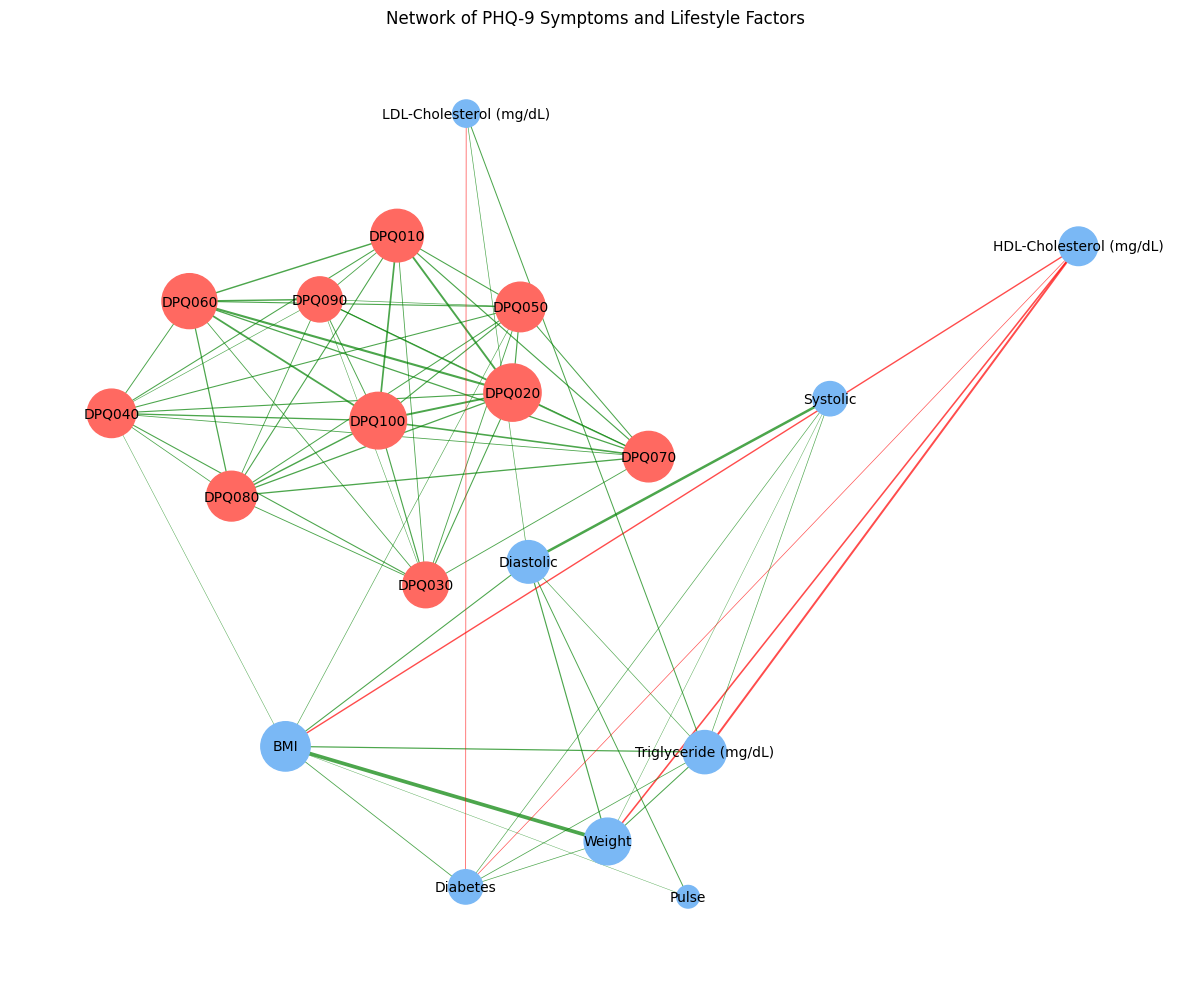

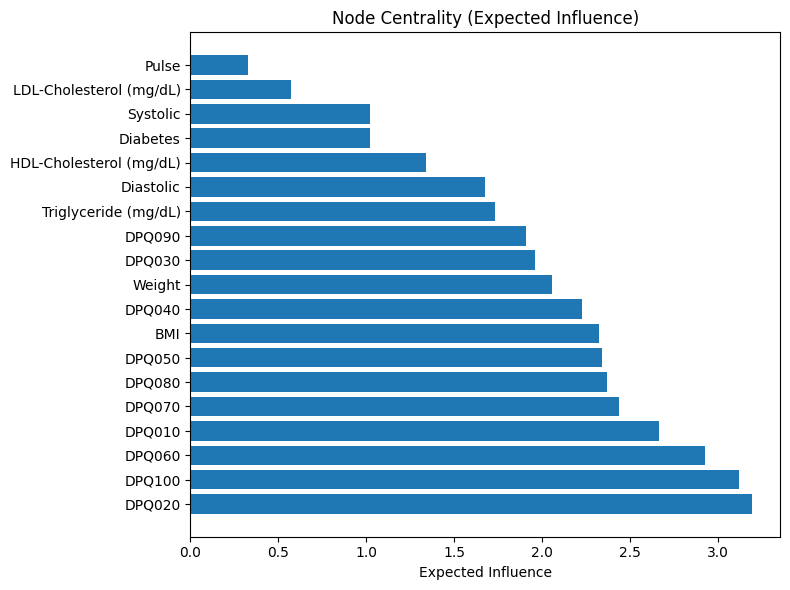

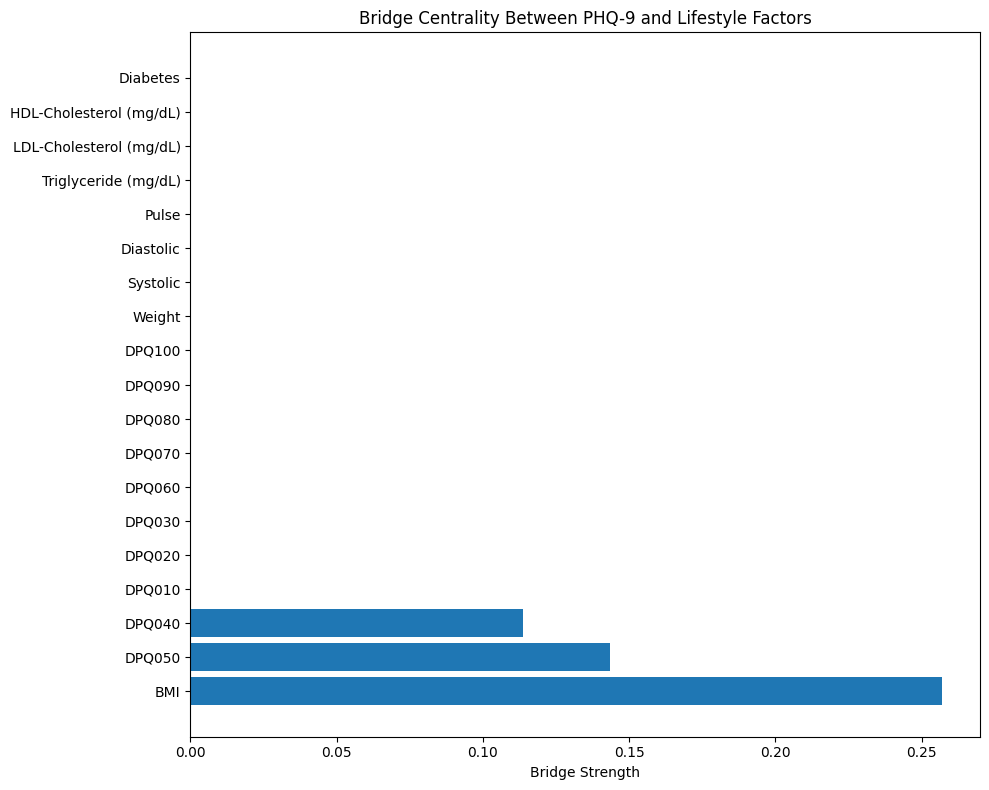

In [ ]:


# 4. Create network
G = nx.from_numpy_array(adj_matrix, create_using=nx.Graph)
node_mapping = {i: var for i, var in enumerate(all_vars)}
G = nx.relabel_nodes(G, node_mapping)

# 5. Calculate centrality measures
expected_influence = {node: sum(abs(data['weight']) for _, _, data in G.edges(node, data=True))
                     for node in G.nodes()}

# Calculate bridge strength (connections between PHQ and lifestyle)
bridge_strength = {}
for node in G.nodes():
    is_phq = 'DPQ' in node
    strength = 0
    for neighbor in G.neighbors(node):
        is_neighbor_phq = 'DPQ' in neighbor
        if is_phq != is_neighbor_phq:  # Connection between different types
            strength += abs(G[node][neighbor]['weight'])
    bridge_strength[node] = strength

# 6. Visualize network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42,  k=1, iterations=50)

# Node colors by type
node_colors = ['#FF6961' if 'DPQ' in node else '#7AB8F5' for node in G.nodes()]

# Node sizes by expected influence
node_sizes = [expected_influence[node] * 500 + 100 for node in G.nodes()]

# Edge colors by weight
edge_colors = ['red' if G[u][v]['weight'] < 0 else 'green' for u, v in G.edges()]
edge_widths = [abs(G[u][v]['weight']) * 3 for u, v in G.edges()]

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('Network of PHQ-9 Symptoms and Lifestyle Factors')
plt.axis('off')
plt.tight_layout()
plt.show()

# 7. Plot centrality measures
plt.figure(figsize=(8, 6))
sorted_nodes = sorted(expected_influence.items(), key=lambda x: x[1], reverse=True)
plt.barh([node for node, _ in sorted_nodes], [val for _, val in sorted_nodes])
plt.xlabel('Expected Influence')
plt.title('Node Centrality (Expected Influence)')
plt.tight_layout()
plt.show()

# 8. Plot bridge strength
plt.figure(figsize=(10, 8))
sorted_bridge = sorted(bridge_strength.items(), key=lambda x: x[1], reverse=True)
plt.barh([node for node, _ in sorted_bridge], [val for _, val in sorted_bridge])
plt.xlabel('Bridge Strength')
plt.title('Bridge Centrality Between PHQ-9 and Lifestyle Factors')
plt.tight_layout()
plt.show()


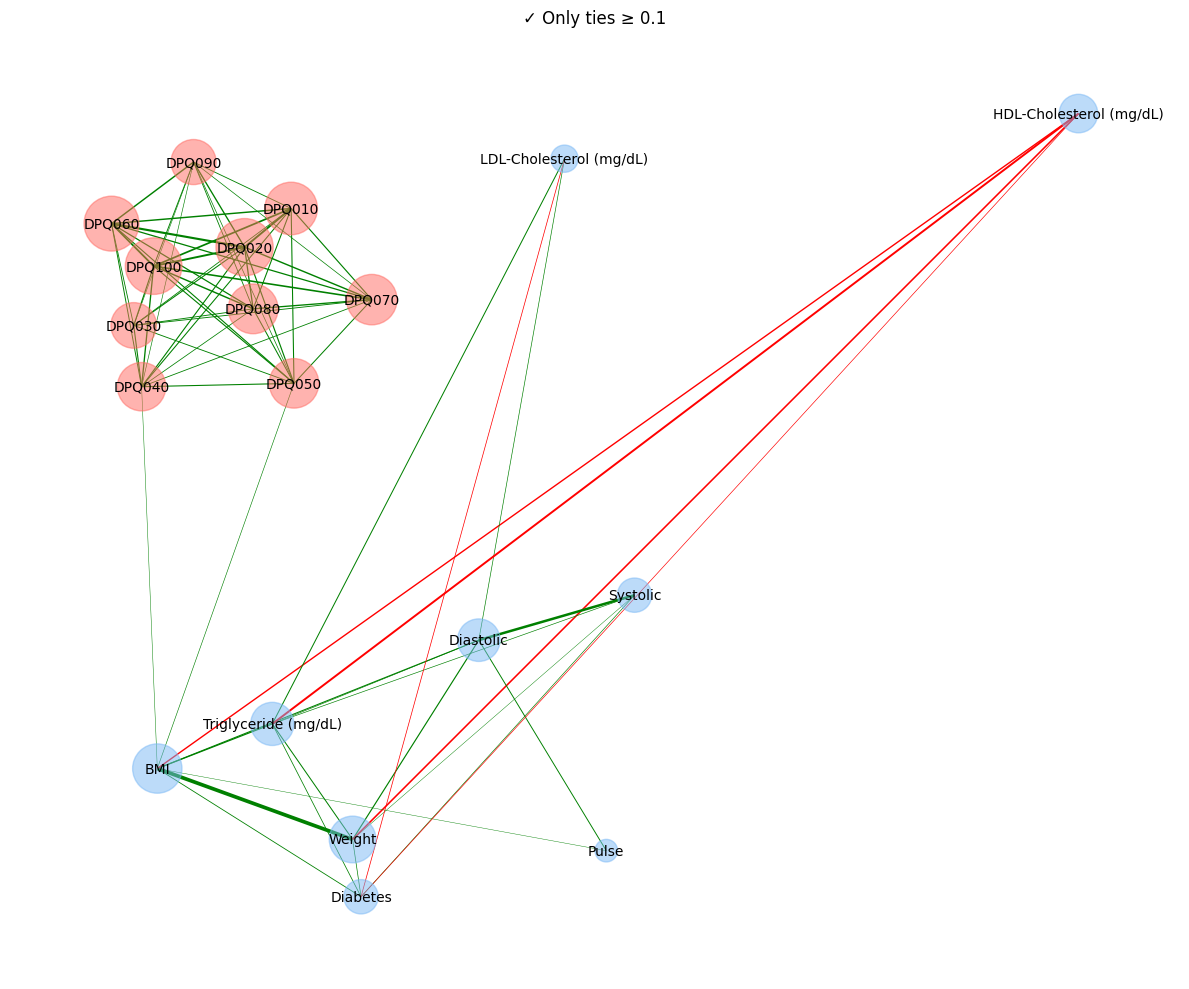

In [ ]:
# define your minimum strength
min_strength = 0.1

# build a list of only the strong edges
strong_edges = [
    (u, v, d) for u, v, d in G.edges(data=True)
    if abs(d['weight']) >= min_strength
]

# create a subgraph of only those edges (optional)
H = nx.Graph()
H.add_nodes_from(G.nodes(data=True))
for u, v, d in strong_edges:
    H.add_edge(u, v, **d)

# now draw H instead of G
plt.figure(figsize=(12,10))
pos = nx.spring_layout(H, seed=42, k=0.5, scale = 0.1, iterations=50)

# node styling as before
node_colors = ['#FF6961' if 'DPQ' in n else '#7AB8F5' for n in H.nodes()]
node_sizes  = [expected_influence[n]*500+100 for n in H.nodes()]

# edge styling, unpacking from H
edge_colors = ['red' if H[u][v]['weight']<0 else 'green' for u,v in H.edges()]
edge_widths = [abs(H[u][v]['weight'])*3 for u,v in H.edges()]

nx.draw_networkx_nodes(H, pos, node_color=node_colors, node_size=node_sizes, alpha=0.5)
nx.draw_networkx_edges(H, pos, edge_color=edge_colors, width=edge_widths, alpha=1)
nx.draw_networkx_labels(H, pos, font_size=10)

plt.title(f'✓ Only ties ≥ {min_strength}')
plt.axis('off')
plt.tight_layout()
plt.show()


## Lifestyle Net

In [ ]:
# List of all DataFrames
dfs = [life, dpq]

# Merge all DataFrames on 'SEQN' and 'Depression_Label' using outer join
df = reduce(lambda left, right: pd.merge(left, right, on=['SEQN', 'Depression_Label'], how='outer'), dfs)

df = df.dropna()
df

,SEQN,SleepProblem,Smokes,AlcoholConsumption,Depression_Label,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,Year,PHQ9_Score
38536,93711.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2018,2.0
38537,93712.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2018,1.0
38538,93713.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,2017-2018,8.0
38539,93714.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2018,2.0
38540,93715.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2018,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54881,124813.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2020,2.0
54884,124817.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2020,4.0
54885,124818.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2020,1.0
54886,124821.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2020,5.0


In [ ]:
df.columns

Index(['SEQN', 'SleepProblem', 'Smokes', 'AlcoholConsumption',
       'Depression_Label', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050',
       'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100', 'Year', 'PHQ9_Score'],
      dtype='object')

In [ ]:
phq_cols = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100']

lifestyle_cols = ['SleepProblem', 'Smokes', 'AlcoholConsumption']

# 1. Preprocess data
# Standardize continuous variables
scaler = StandardScaler()
df[phq_cols] = scaler.fit_transform(df[phq_cols])

# 2. Compute correlation matrix (Spearman for mixed data types)
all_vars = phq_cols + lifestyle_cols
corr_matrix, _ = spearmanr(df[all_vars], axis=0)
np.fill_diagonal(corr_matrix, 0)  # Set diagonal to zero



In [ ]:
# 3. One-hot encode the *categorical* lifestyle columns
ohe = OneHotEncoder(sparse_output=False, drop='first')
lifestyle_ohe = ohe.fit_transform(df[lifestyle_cols])
lifestyle_ohe_cols = ohe.get_feature_names_out(lifestyle_cols)

# 4. Re-assemble your analysis matrix
X = np.hstack([df[phq_cols].values, lifestyle_ohe])
all_vars = phq_cols + list(lifestyle_ohe_cols)

# 5. Compute Spearman correlation
corr_matrix, _ = spearmanr(X, axis=0)
np.fill_diagonal(corr_matrix, 0)

In [ ]:
# 3. Apply LASSO-like thresholding to create sparse network
threshold = 0.1  # Adjust based on desired network sparsity
adj_matrix = np.where(np.abs(corr_matrix) > threshold, corr_matrix, 0)

adj_matrix

array([[0.        , 0.47259522, 0.21430815, 0.28118678, 0.26091781,
        0.34545601, 0.28048979, 0.24306433, 0.21614477, 0.40430083,
        0.15876621, 0.        , 0.        ],
       [0.47259522, 0.        , 0.25251669, 0.30062002, 0.28970607,
        0.52479014, 0.34423051, 0.31847979, 0.32397102, 0.47240098,
        0.17785415, 0.        , 0.        ],
       [0.21430815, 0.25251669, 0.        , 0.27473226, 0.21384055,
        0.21411779, 0.22384633, 0.21111744, 0.1530706 , 0.27227062,
        0.33281634, 0.        , 0.        ],
       [0.28118678, 0.30062002, 0.27473226, 0.        , 0.24777377,
        0.23764201, 0.21949168, 0.20874335, 0.16056517, 0.31862987,
        0.17249131, 0.        , 0.        ],
       [0.26091781, 0.28970607, 0.21384055, 0.24777377, 0.        ,
        0.27031068, 0.24765117, 0.24825024, 0.15913968, 0.28339072,
        0.11107341, 0.        , 0.        ],
       [0.34545601, 0.52479014, 0.21411779, 0.23764201, 0.27031068,
        0.        , 0.33640

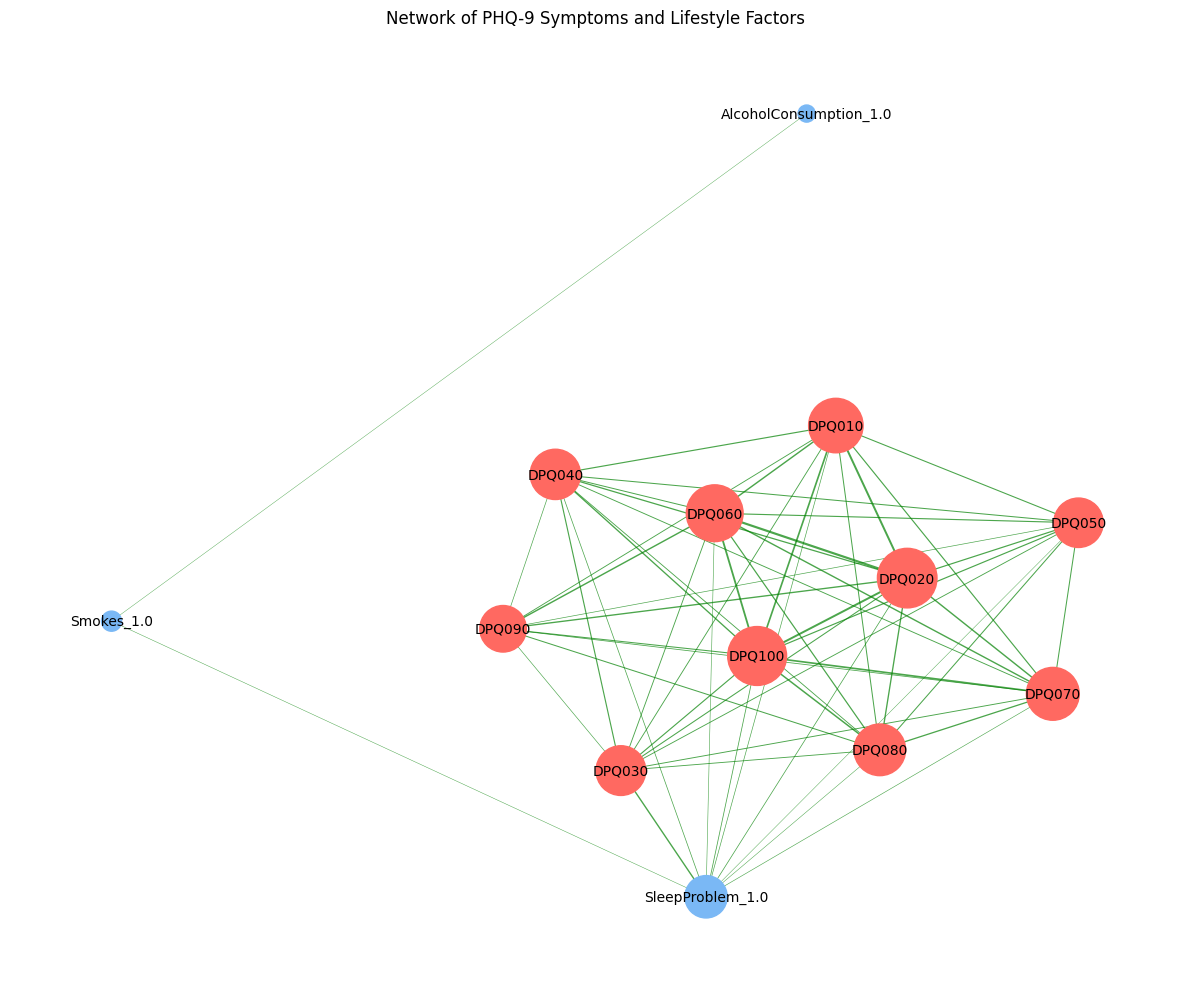

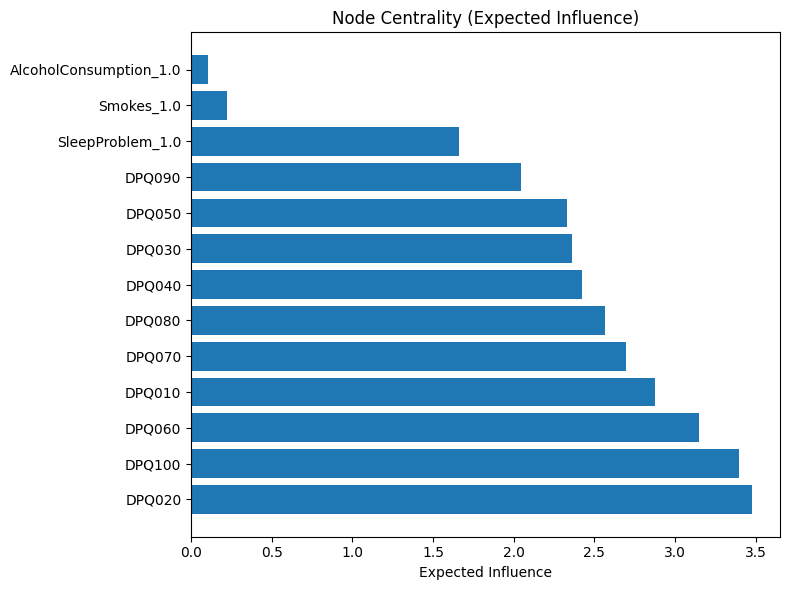

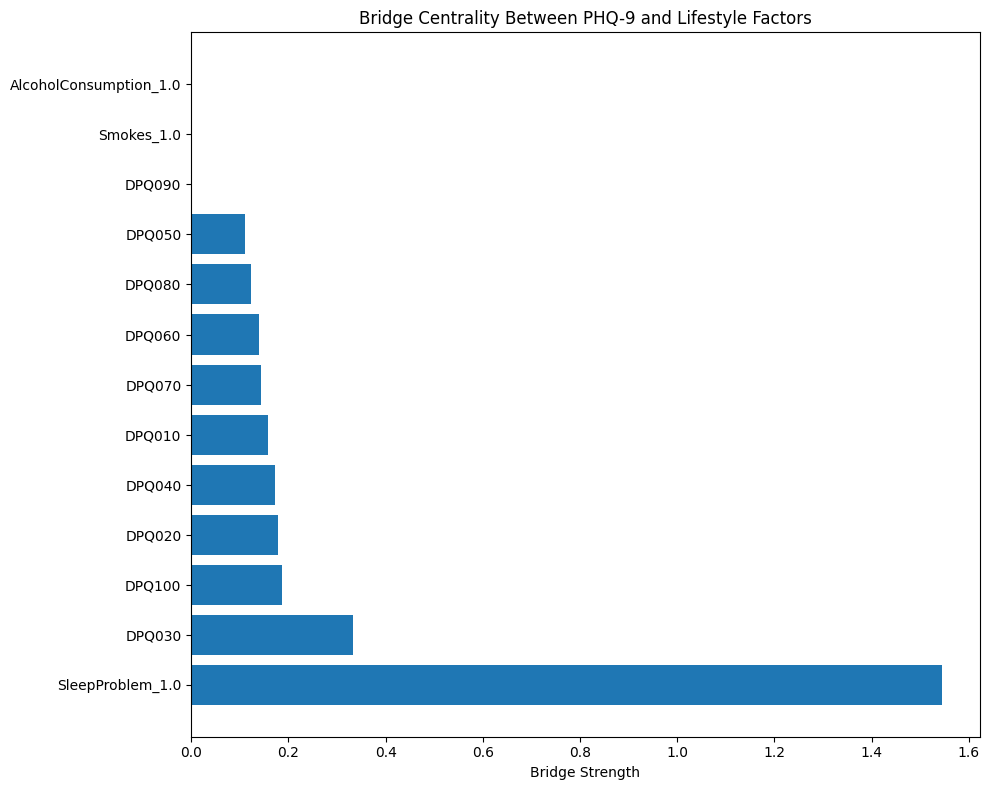

In [ ]:
# 4. Create network
G = nx.from_numpy_array(adj_matrix, create_using=nx.Graph)
node_mapping = {i: var for i, var in enumerate(all_vars)}
G = nx.relabel_nodes(G, node_mapping)

# 5. Calculate centrality measures
expected_influence = {node: sum(abs(data['weight']) for _, _, data in G.edges(node, data=True))
                     for node in G.nodes()}

# Calculate bridge strength (connections between PHQ and lifestyle)
bridge_strength = {}
for node in G.nodes():
    is_phq = 'DPQ' in node
    strength = 0
    for neighbor in G.neighbors(node):
        is_neighbor_phq = 'DPQ' in neighbor
        if is_phq != is_neighbor_phq:  # Connection between different types
            strength += abs(G[node][neighbor]['weight'])
    bridge_strength[node] = strength

# 6. Visualize network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42,  k=1, iterations=50)

# Node colors by type
node_colors = ['#FF6961' if 'DPQ' in node else '#7AB8F5' for node in G.nodes()]

# Node sizes by expected influence
node_sizes = [expected_influence[node] * 500 + 100 for node in G.nodes()]

# Edge colors by weight
edge_colors = ['red' if G[u][v]['weight'] < 0 else 'green' for u, v in G.edges()]
edge_widths = [abs(G[u][v]['weight']) * 3 for u, v in G.edges()]

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('Network of PHQ-9 Symptoms and Lifestyle Factors')
plt.axis('off')
plt.tight_layout()
plt.show()

# 7. Plot centrality measures
plt.figure(figsize=(8, 6))
sorted_nodes = sorted(expected_influence.items(), key=lambda x: x[1], reverse=True)
plt.barh([node for node, _ in sorted_nodes], [val for _, val in sorted_nodes])
plt.xlabel('Expected Influence')
plt.title('Node Centrality (Expected Influence)')
plt.tight_layout()
plt.show()

# 8. Plot bridge strength
plt.figure(figsize=(10, 8))
sorted_bridge = sorted(bridge_strength.items(), key=lambda x: x[1], reverse=True)
plt.barh([node for node, _ in sorted_bridge], [val for _, val in sorted_bridge])
plt.xlabel('Bridge Strength')
plt.title('Bridge Centrality Between PHQ-9 and Lifestyle Factors')
plt.tight_layout()
plt.show()


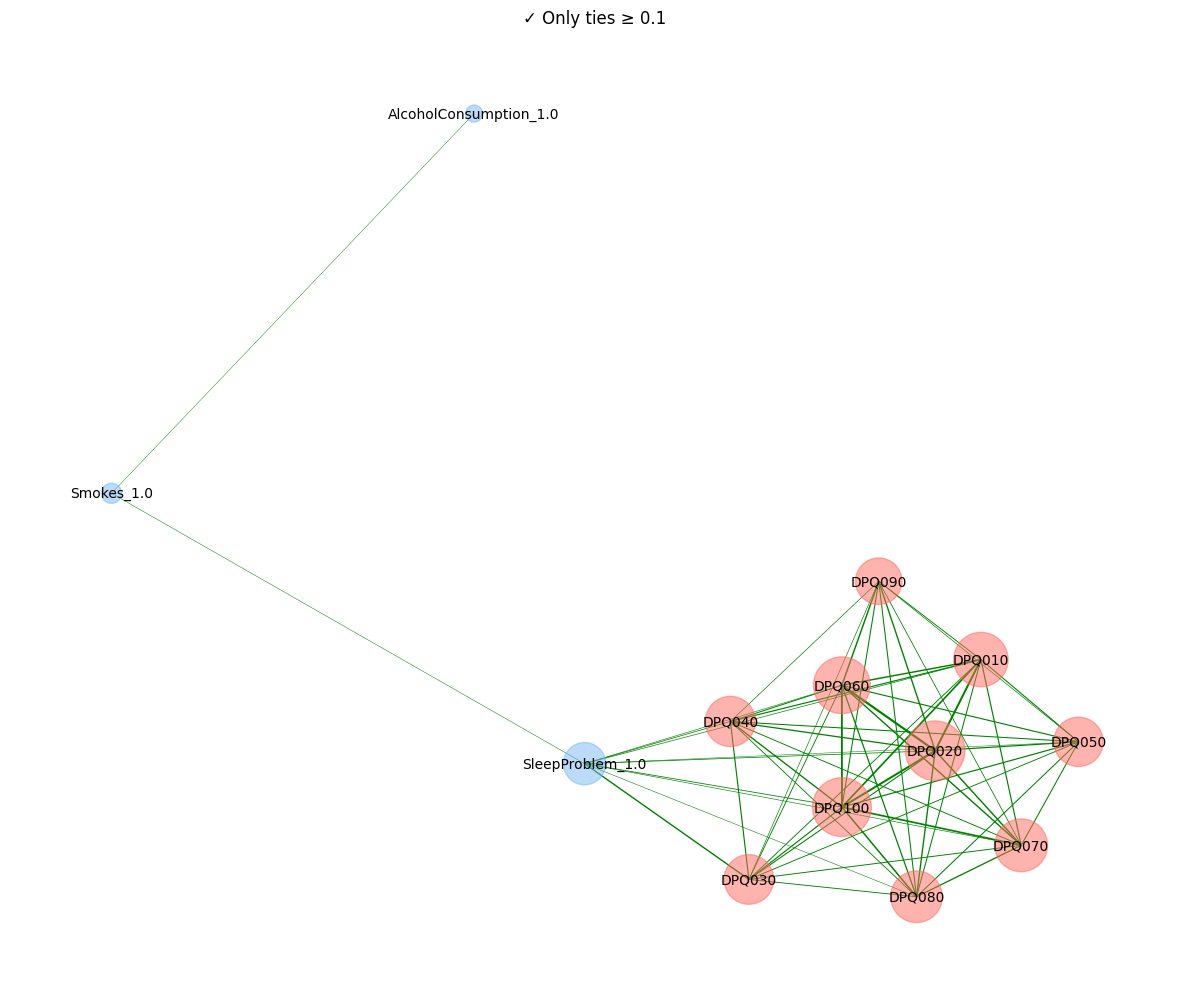

In [ ]:
# define your minimum strength
min_strength = 0.1

# build a list of only the strong edges
strong_edges = [
    (u, v, d) for u, v, d in G.edges(data=True)
    if abs(d['weight']) >= min_strength
]

# create a subgraph of only those edges (optional)
H = nx.Graph()
H.add_nodes_from(G.nodes(data=True))
for u, v, d in strong_edges:
    H.add_edge(u, v, **d)

# now draw H instead of G
plt.figure(figsize=(12,10))
pos = nx.spring_layout(H, seed=42, k=0.5, scale = 0.1, iterations=50)

# node styling as before
node_colors = ['#FF6961' if 'DPQ' in n else '#7AB8F5' for n in H.nodes()]
node_sizes  = [expected_influence[n]*500+100 for n in H.nodes()]

# edge styling, unpacking from H
edge_colors = ['red' if H[u][v]['weight']<0 else 'green' for u,v in H.edges()]
edge_widths = [abs(H[u][v]['weight'])*3 for u,v in H.edges()]

nx.draw_networkx_nodes(H, pos, node_color=node_colors, node_size=node_sizes, alpha=0.5)
nx.draw_networkx_edges(H, pos, edge_color=edge_colors, width=edge_widths, alpha=1)
nx.draw_networkx_labels(H, pos, font_size=10)

plt.title(f'✓ Only ties ≥ {min_strength}')
plt.axis('off')
plt.tight_layout()
plt.show()


## Demographic Net

In [39]:
from sklearn.preprocessing import OneHotEncoder
from functools import reduce
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [40]:
# List of all DataFrames
dfs = [demo, dpq]

# Merge all DataFrames on 'SEQN' and 'Depression_Label' using outer join
df = reduce(lambda left, right: pd.merge(left, right, on=['SEQN', 'Depression_Label'], how='outer'), dfs)

df = df.dropna()

In [41]:
df

,SEQN,Age,Gender,Race,MaritalStatus,IncomeRatio,EducationLevel,PHQ9_Score_x,Depression_Label,Year_x,...,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,Year_y,PHQ9_Score_y
24301,109273.0,36.0,1.0,3.0,3.0,0.83,4.0,15.0,1.0,2017-2020,...,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,2017-2020,15.0
24303,109290.0,68.0,2.0,4.0,2.0,5.00,5.0,2.0,0.0,2017-2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2017-2020,2.0
24308,109315.0,30.0,2.0,4.0,3.0,2.16,4.0,1.0,0.0,2017-2020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2020,1.0
24312,109323.0,22.0,1.0,1.0,3.0,2.38,4.0,4.0,0.0,2017-2020,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2017-2020,4.0
24319,109340.0,44.0,1.0,7.0,1.0,1.13,4.0,1.0,0.0,2017-2020,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2020,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29805,124793.0,35.0,1.0,1.0,1.0,2.31,3.0,4.0,0.0,2017-2020,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2020,4.0
29808,124809.0,23.0,2.0,1.0,1.0,4.34,4.0,12.0,1.0,2017-2020,...,2.0,2.0,2.0,1.0,2.0,1.0,0.0,1.0,2017-2020,12.0
29809,124810.0,56.0,2.0,4.0,3.0,1.93,4.0,1.0,0.0,2017-2020,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2020,1.0
29814,124818.0,40.0,1.0,4.0,1.0,3.82,5.0,1.0,0.0,2017-2020,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-2020,1.0


In [42]:
df.columns

Index(['SEQN', 'Age', 'Gender', 'Race', 'MaritalStatus', 'IncomeRatio',
       'EducationLevel', 'PHQ9_Score_x', 'Depression_Label', 'Year_x',
       'HoursWorked', 'WorkSchedule', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040',
       'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100', 'Year_y',
       'PHQ9_Score_y'],
      dtype='object')

In [43]:
phq_cols = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100']

life_cols = ['Age', 'IncomeRatio', 'HoursWorked']

life_cols_cat = ['Gender', 'Race', 'MaritalStatus','EducationLevel', 'WorkSchedule']

# 1. Preprocess data
# Standardize continuous variables
scaler = StandardScaler()
df[phq_cols] = scaler.fit_transform(df[phq_cols])

# 2. Compute correlation matrix (Spearman for mixed data types)
all_vars = phq_cols + life_cols + life_cols_cat
corr_matrix, _ = spearmanr(df[all_vars], axis=0)
np.fill_diagonal(corr_matrix, 0)  # Set diagonal to zero



In [44]:
# 3. One-hot encode the *categorical* lifestyle columns
ohe = OneHotEncoder(sparse_output=False, drop='first')
lifestyle_ohe = ohe.fit_transform(df[life_cols_cat])
lifestyle_ohe_cols = ohe.get_feature_names_out(life_cols_cat)

# 4. Re-assemble your analysis matrix
X = np.hstack([df[phq_cols].values, df[life_cols].values, lifestyle_ohe])
all_vars = phq_cols + list(lifestyle_ohe_cols) + list(life_cols)

# 5. Compute Spearman correlation
corr_matrix, _ = spearmanr(X, axis=0)
np.fill_diagonal(corr_matrix, 0)

In [45]:
# 3. Apply LASSO-like thresholding to create sparse network
threshold = 0.1  # Adjust based on desired network sparsity
adj_matrix = np.where(np.abs(corr_matrix) > threshold, corr_matrix, 0)

adj_matrix

array([[ 0.        ,  0.411923  ,  0.1636815 ,  0.21660505,  0.21335153,
         0.286608  ,  0.22495743,  0.14980133,  0.15652898,  0.36003044,
         0.        , -0.12931586,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.10811403,
         0.        ,  0.        ,  0.        ],
       [ 0.411923  ,  0.        ,  0.18477063,  0.21045001,  0.2378221 ,
         0.48640726,  0.26944509,  0.21964531,  0.26955646,  0.41733626,
         0.        , -0.1236749 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.1636815 ,  0.18477063,  0.        ,  0.22016203,  0.1888524 ,
         0.15927694,  0.1782979 ,  0.17435694,  0.11357804,  0.24708972,
         0.        ,  0.    

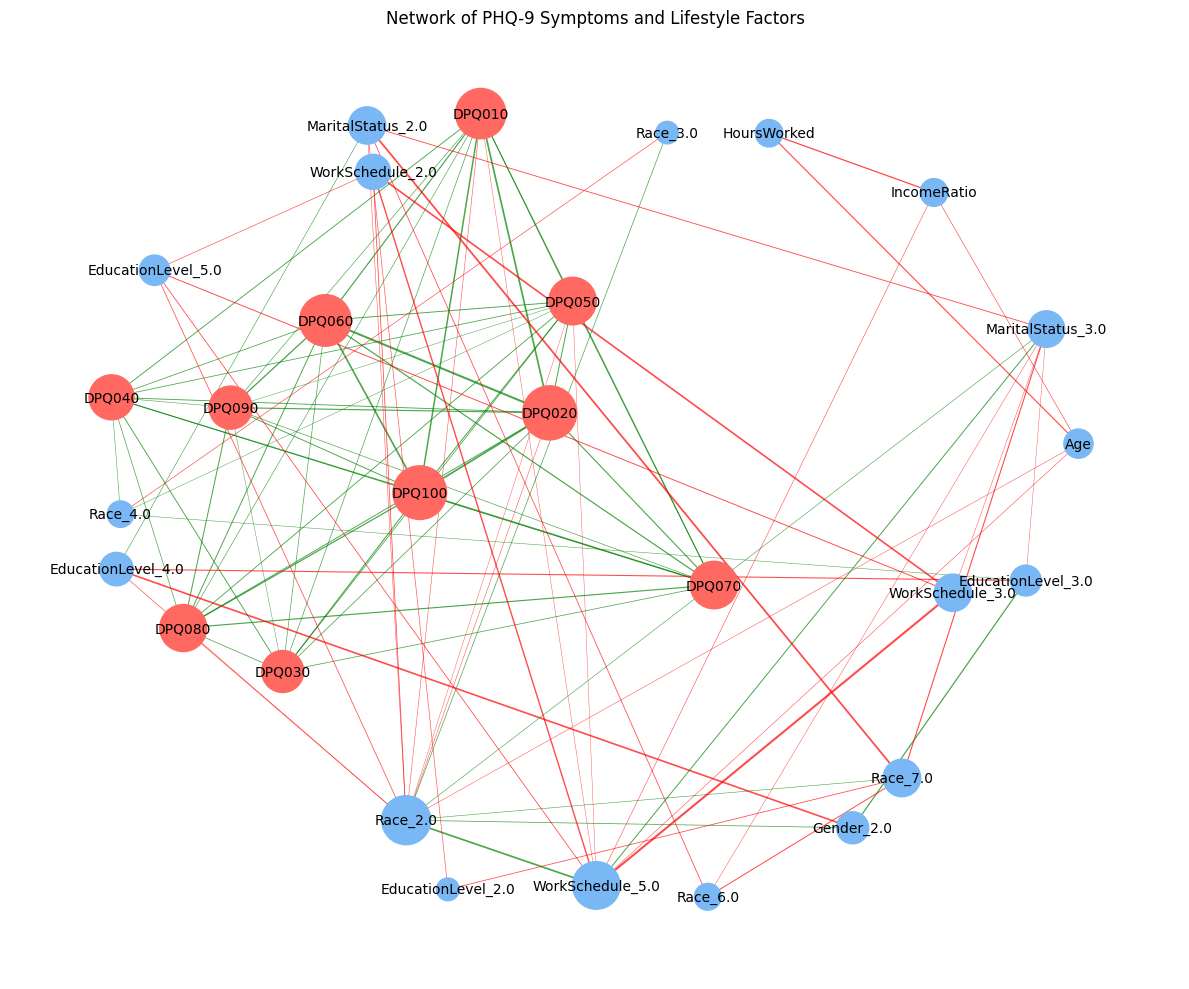

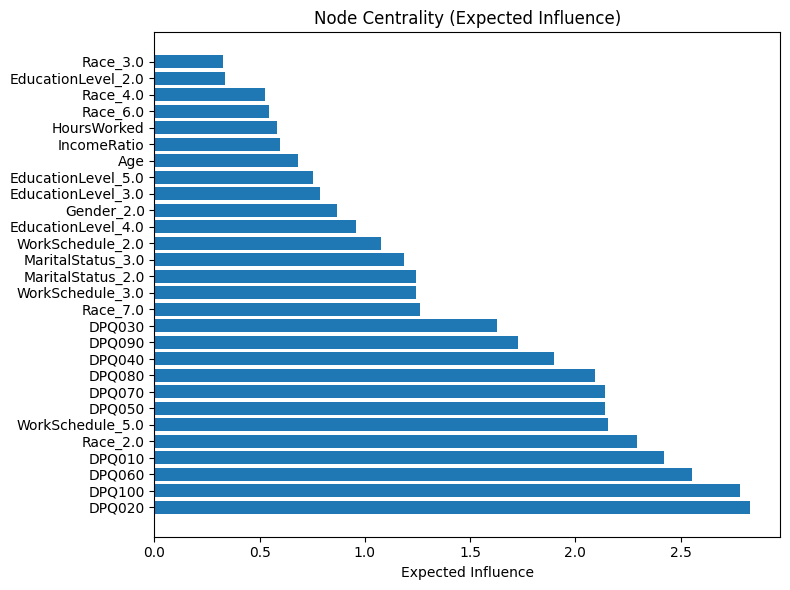

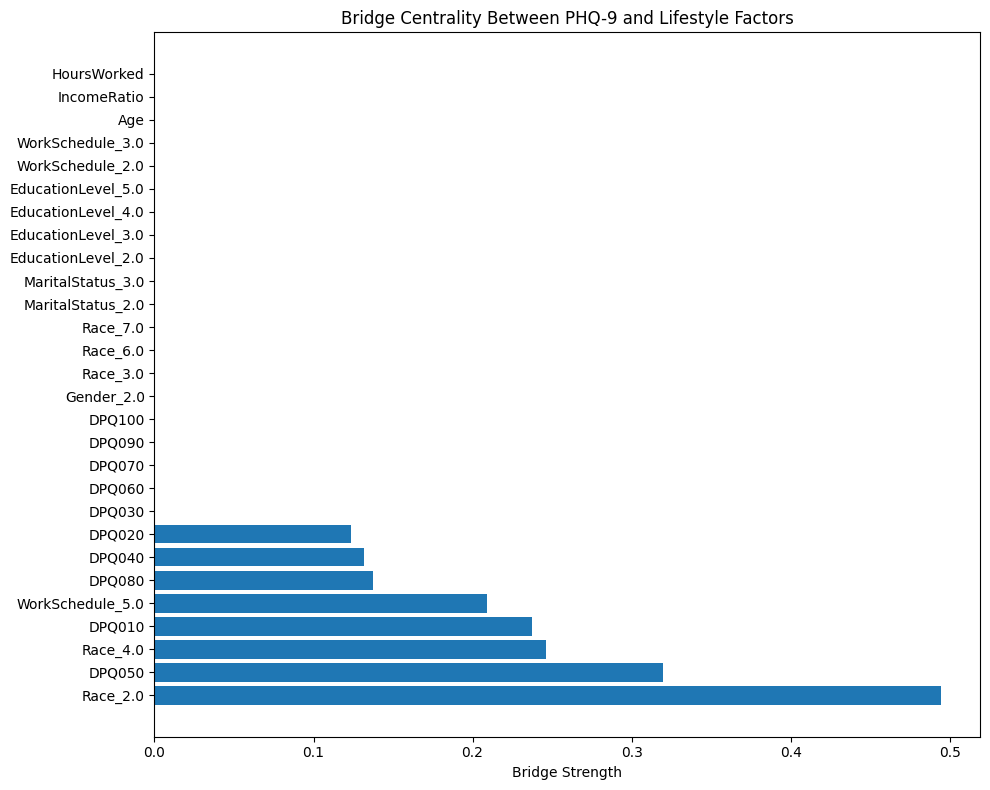

In [46]:
# 4. Create network
G = nx.from_numpy_array(adj_matrix, create_using=nx.Graph)
node_mapping = {i: var for i, var in enumerate(all_vars)}
G = nx.relabel_nodes(G, node_mapping)

# 5. Calculate centrality measures
expected_influence = {node: sum(abs(data['weight']) for _, _, data in G.edges(node, data=True))
                     for node in G.nodes()}

# Calculate bridge strength (connections between PHQ and lifestyle)
bridge_strength = {}
for node in G.nodes():
    is_phq = 'DPQ' in node
    strength = 0
    for neighbor in G.neighbors(node):
        is_neighbor_phq = 'DPQ' in neighbor
        if is_phq != is_neighbor_phq:  # Connection between different types
            strength += abs(G[node][neighbor]['weight'])
    bridge_strength[node] = strength

# 6. Visualize network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42,  k=1.2, iterations=50)

# Node colors by type
node_colors = ['#FF6961' if 'DPQ' in node else '#7AB8F5' for node in G.nodes()]

# Node sizes by expected influence
node_sizes = [expected_influence[node] * 500 + 100 for node in G.nodes()]

# Edge colors by weight
edge_colors = ['red' if G[u][v]['weight'] < 0 else 'green' for u, v in G.edges()]
edge_widths = [abs(G[u][v]['weight']) * 3 for u, v in G.edges()]

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('Network of PHQ-9 Symptoms and Lifestyle Factors')
plt.axis('off')
plt.tight_layout()
plt.show()

# 7. Plot centrality measures
plt.figure(figsize=(8, 6))
sorted_nodes = sorted(expected_influence.items(), key=lambda x: x[1], reverse=True)
plt.barh([node for node, _ in sorted_nodes], [val for _, val in sorted_nodes])
plt.xlabel('Expected Influence')
plt.title('Node Centrality (Expected Influence)')
plt.tight_layout()
plt.show()

# 8. Plot bridge strength
plt.figure(figsize=(10, 8))
sorted_bridge = sorted(bridge_strength.items(), key=lambda x: x[1], reverse=True)
plt.barh([node for node, _ in sorted_bridge], [val for _, val in sorted_bridge])
plt.xlabel('Bridge Strength')
plt.title('Bridge Centrality Between PHQ-9 and Lifestyle Factors')
plt.tight_layout()
plt.show()


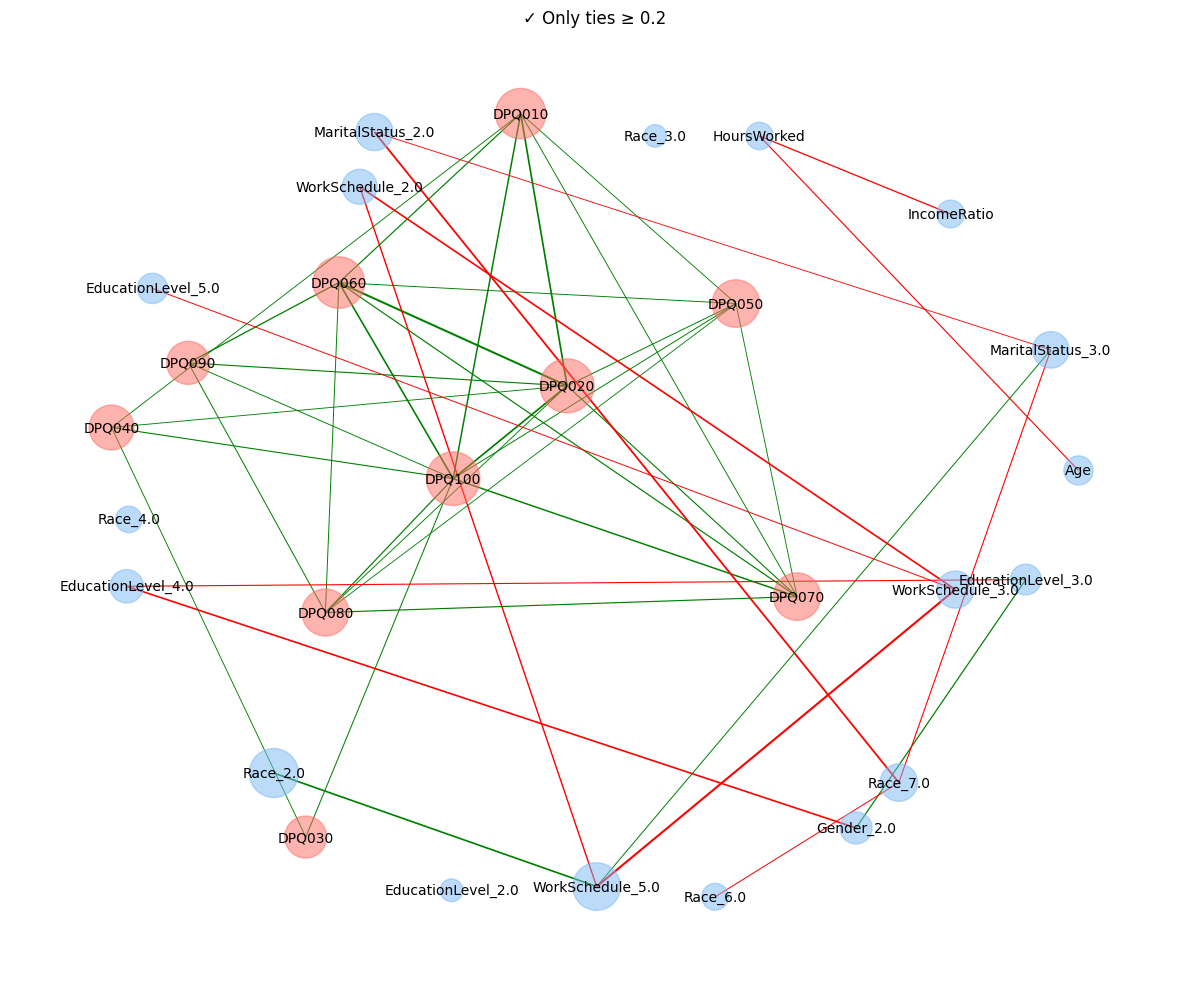

In [47]:
# define your minimum strength
min_strength = 0.2

# build a list of only the strong edges
strong_edges = [
    (u, v, d) for u, v, d in G.edges(data=True)
    if abs(d['weight']) >= min_strength
]

# create a subgraph of only those edges (optional)
H = nx.Graph()
H.add_nodes_from(G.nodes(data=True))
for u, v, d in strong_edges:
    H.add_edge(u, v, **d)

# now draw H instead of G
plt.figure(figsize=(12,10))
pos = nx.spring_layout(H, seed=42, k=1.2, scale = 1, iterations=50)

# node styling as before
node_colors = ['#FF6961' if 'DPQ' in n else '#7AB8F5' for n in H.nodes()]
node_sizes  = [expected_influence[n]*500+100 for n in H.nodes()]

# edge styling, unpacking from H
edge_colors = ['red' if H[u][v]['weight']<0 else 'green' for u,v in H.edges()]
edge_widths = [abs(H[u][v]['weight'])*3 for u,v in H.edges()]

nx.draw_networkx_nodes(H, pos, node_color=node_colors, node_size=node_sizes, alpha=0.5)
nx.draw_networkx_edges(H, pos, edge_color=edge_colors, width=edge_widths, alpha=1)
nx.draw_networkx_labels(H, pos, font_size=10)

plt.title(f'✓ Only ties ≥ {min_strength}')
plt.axis('off')
plt.tight_layout()
plt.show()
